<h1 align = center><font size = 10>Build a Regression Model in Keras</font></h1>
<h2 align = center><font size = 6>Part A: Build a Baseline Model</font></h2>

## Introduction

In this course project, we will build a regression model using the deep learning Keras library to model the data about concrete compressive strength. We will experiment with increasing the number of training epochs and changing number of hidden layers, and we will see how changing these parameters impacts the performance of the model.

## Objectives for this Notebook

Use the Keras library to build a neural network with **1 hidden layer** of **10 nodes** with **relu** activation function, the **adam** optimizer, and the **mean_squared_error** loss function, with consists of:
1. Randomly split the data into training and test sets by holding 30% of the data for testing. We can use the train_test_split helper function from sklearn.
2. Train the model on the training data using **50 epochs**.
3. Evaluate the model on the test data and compute the mean square error between the predicted concrete strength and the actual concrete strength. We can use the **mean_squared_error** function from sklearn.
4. Repeat steps 1-3, **50 times**, and create a list of **50** mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.

## Table of Contents

1. Import Packages
2. Import Data
3. Visualize Data
4. Split Data into Predictors and Target
5. Create Network Initialization Function
6. Iterate Core Loop
7. Report Statistics
8. Discussions

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display
%matplotlib inline

## Import Data

In [2]:
concrete_df = pd.read_csv("Data/concrete_data.csv")
display(concrete_df.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### About this Dataset

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

## Visualize Data

#### Print Shape

In [3]:
print(concrete_df.shape)

(1030, 9)


#### Describe Data

In [4]:
display(concrete_df.describe())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Check Null Values

In [5]:
display(concrete_df.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

## Split Data into Predictors and Target

In [6]:
concrete_columns = concrete_df.columns
predictors_df = concrete_df[concrete_columns[concrete_columns != 'Strength']]
num_predictors = predictors_df.shape[1]
target = concrete_df['Strength']
target_df = pd.DataFrame(target)
target_df.set_axis(['Strength'], axis = 1, inplace = True)

print("Predictors:")
display(predictors_df.head())
print()
print("Target:")
display(target_df.head())

Predictors:


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360



Target:


,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


## Create Network Initialization Function

In [7]:
def regression_model():
    output_model = Sequential()
    output_model.add(Dense(10, activation ='relu', input_shape = (num_predictors,)))
    output_model.add(Dense(1))

    output_model.compile(optimizer ='adam', loss ='mean_squared_error')
    return output_model

## Iterate Core Loop

In [8]:
mean_squared_errors_df = pd.DataFrame(np.zeros((50, 3)))
mean_squared_errors_df.set_axis(['MSE', 'RMSE', 'STD'], axis = 1, inplace = True)

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(predictors_df, target_df, test_size = 0.3, random_state = i)

    model = regression_model()
    model.fit(x_train, y_train, validation_split = 0.3, epochs = 50, verbose = 0)

    y_hat = model.predict(x_test)
    mean_squared_errors_df.at[i, 'MSE'] = mean_squared_error(y_test, y_hat, squared = True)
    mean_squared_errors_df.at[i, 'RMSE'] = np.sqrt(mean_squared_errors_df['MSE'][i])
    mean_squared_errors_df.at[i, 'STD'] = np.std(np.abs(y_hat - y_test)) / np.sqrt(y_hat.shape[0])

display(mean_squared_errors_df)

Metal device set to: Apple M1 Max


2022-04-08 17:29:07.036760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 17:29:07.036872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-08 17:29:07.118041: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-08 17:29:07.253374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-08 17:29:07.509294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-08 17:29:11.293618: I tensorflow/core/grappler/o

,MSE,RMSE,STD
0,306.203620,17.498675,0.622000
1,289.177148,17.005209,0.569424
2,350.907515,18.732526,0.600292
3,398.164354,19.954056,0.617472
4,315.539996,17.763446,0.559013
5,390.657861,19.765067,0.649834
6,296.554372,17.220754,0.542902
7,355.700496,18.860024,0.633871
8,351.582719,18.750539,0.621658
9,342.504375,18.506874,0.601549


## Report Statistics

#### Describe Statistics

In [9]:
display(mean_squared_errors_df.describe())

,MSE,RMSE,STD
count,50.000000,50.000000,50.000000
mean,328.273567,18.093647,0.592969
std,34.415745,0.954843,0.036998
min,243.463139,15.603305,0.485706
25%,305.734662,17.485268,0.574400
50%,325.169981,18.032240,0.594060
75%,351.413918,18.746036,0.621354
max,398.164354,19.954056,0.659901


#### Plot RMSE

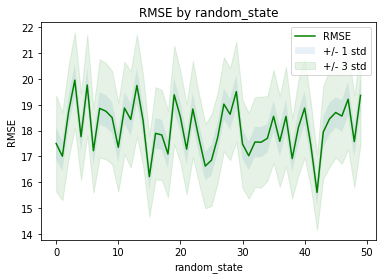

In [10]:
plt.plot(range(50), mean_squared_errors_df['RMSE'], 'g')
plt.fill_between(range(50), mean_squared_errors_df['RMSE'] - mean_squared_errors_df['STD'], mean_squared_errors_df['RMSE'] + mean_squared_errors_df['STD'], alpha = 0.1)
plt.fill_between(range(50), mean_squared_errors_df['RMSE'] - 3 * mean_squared_errors_df['STD'], mean_squared_errors_df['RMSE'] + 3 * mean_squared_errors_df['STD'], alpha = 0.1, color = 'green')
plt.title('RMSE by random_state')
plt.legend(('RMSE', '+/- 1 std', '+/- 3 std'))
plt.ylabel('RMSE')
plt.xlabel('random_state')
plt.show()

## Discussions

Part A serves as the control data to compare the effects of altering the number of epochs and hidden layers has on the accuracy of the model. It's worthy to note that the simplicity of the network, low number of epochs, and low sample size place great limitations on the accuracy of the data.